# Système de Gestion de Bases de Données - Modèle relationnel
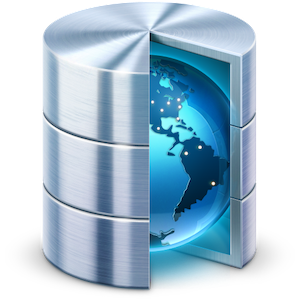

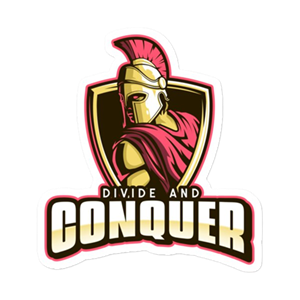

---
## Base de données

Une **donnée** est une valeur numérisée décrivant de manière élémentaire un fait, une mesure, une réalité. Par exemple pour un livre : le nom de l’auteur, le titre du livre, l'année de parution… Pour un élève au lycée : son nom, sa classe, sa note au dernier contrôle de NSI, son cours le lundi de 10h à 12h…  

Aujourd'hui, très peu d'informations sont encore stockées uniquement sur papier.  

Nous avons vu en seconde et en première comment utiliser des données comme celle d’un tableur avec notamment l’utilisation du format **CSV**. Cependant l’utilisation de simples tableaux a ses limites et c’est pour cela que l’on utilise les bases de données.

> 📌 En informatique, une **base de données** est un ensemble d’informations **structurées**, stockées de manière **persistante** et consultables électroniquement.  

### Des donnés structurées
Un fichier de base de données respecte nécessairement une **structure** qui permet de distinguer les données les unes des autres.

Dans un fichier CSV par exemple, les données élémentaires sont représentées par des champs délimités par des virgules ou des points-virgule. Les champs sont associés les uns aux autres par le simple fait d’être placés dans une même ligne. Les lignes en revanche sont indépendantes les unes des autres. On peut placer autant de lignes que l’on veut dans un fichier, et même changer leur ordre sans que cela modifie en quoi que ce soit l’information représentée.

Voici un exemple de données représentées en CSV :
```
"Hugo" ; "Victor" ; "Les misérables" ; 1862
```

On comprend bien que le premier champ est le nom, le second le prénom, etc. Il paraît donc cohérent d’ajouter de nouvelles lignes ainsi :
```
"Hugo" ; "Victor" ; "Les misérables" ; 1862
"Stevenson" ; "Robert-Louis"  ; "Voyage dans les Cévennes avec un âne" ; 1879
"Stendhal" ; "Henri" ; "Le rouge et le noir" ; 1830
```

### Des données persistantes
Dans un programme, lorsque vous stockez des données de celui-ci dans un dictionnaire par exemple, elles sont enregistrées dans la mémoire vive de votre ordinateur, ainsi lorsque votre programme s'arrête, le contenu de votre dictionnaire sera perdu.

Pour éviter ce problème, on souhaite mémoriser les données de manière **persistante**. La persistance désigne la capacité d’une base à exister indépendamment des applications qui la manipulent. On peut arrêter toutes les machines un soir et retrouver la base de données le lendemain. Cela implique qu’une base est toujours stockée sur un support comme les disques magnétiques qui préservent leur contenu même en l’absence d’alimentation électrique.

---
## Système de Gestion de Bases de Données 

### Les limites du fichier csv
Nous avons donné une structure régulière à nos informations, ceci va permettre de les interroger et de les manipuler avec précision. Les données seront stockées dans un fichier sur le disque dur de notre ordinateur. Nous sommes donc en cours de constitution d’une véritable base de données. 

Imaginons maintenant que nous voulions construire des applications en nous appuyant directement sur des fichiers structurés, par exemple des fichiers CSV. Dans une telle situation, chaque utilisateur appliquera des programmes au fichier pour en extraire des données, les modifier ou encore en créer.

Cette approche soulèvera de nombreuses difficultés, parmi lesquelles :

- **Lourdeur d’accès aux données** : En pratique, pour chaque accès, même le plus simple, il faudrait écrire un programme adapté à la structure du fichier. La production et la maintenance de tels programmes seraient extrêmement coûteuses. 
- **Risques pour l’intégrité et la sécurité** : Si tout programmeur peut accéder directement aux fichiers, il est impossible de garantir la sécurité et l’intégrité des données. Quelqu’un peut très bien par exemple, en toute bonne foi, faire une fausse manœuvre qui rend le fichier illisible.
- **Pas de contrôle de concurrence** : Dans un environnement où plusieurs utilisateurs accèdent aux mêmes fichiers, des problèmes de concurrence d’accès se posent, notamment pour les mises à jour. Comment gérer par exemple la situation où deux utilisateurs souhaitent en même temps modifier la même ligne du fichier ?
- **Performances** : Tant qu’un fichier ne contient que quelques centaines de lignes, on peut supposer que les performances ne posent pas de problème, mais que faire quand on atteint les Gigaoctets (1 000 Mégaoctets), ou même le Téraoctet (1 000 Gigaoctets) ?
- **Limites** : Les fichiers CSV et les logiciels permettant de les manipuler (_Microsoft Excel_ par exemple) disposent de limites qui peuvent parfois vite être dépassées, un exemple : durant la crise COVID au Royaume Uni l'utilisation d'Excel et de fichiers CSV à généré d'énormes erreurs dans le comptage des cas positifs (article : [Un mauvais usage d'Excel évince 16 000 cas positifs Covid-19 en UK](https://www.lemondeinformatique.fr/actualites/lire-microsoft-renforce-la-sanctuarisation-des-donnees-cloud-en-europe-92648.html))



### Systèmes de Gestion de Bases de Données

Pour surmonter ces problèmes des systèmes complexes sont mis en place. Ils seront capables d’offrir un accès simple, sécurisé, performant au contenu d’une base, et de satisfaire de tels accès pour des dizaines, centaines ou même milliers d’utilisateurs simultanés, le tout en garantissant l’intégrité de la base même en cas de panne. De tels systèmes sont appelés **S**ystèmes de **G**estion de **B**ases de **D**onnées ou SGBD.

> 📌 Un **Système de Gestion de Bases de Données (SGBD)** ou **DataBase Management System (DBMS)** est un système informatique qui assure la gestion de l’ensemble des informations stockées dans une base de données. Il prend en charge, notamment, les grandes fonctionnalités suivantes :
>- Le **stockage** des données dans des systèmes de fichiers incluant la **sauvegarde** de ceux-ci.
>- La sécurisation des **droits** différents selon les profils d’utilisateurs et la gestion des **accès** concurrents aux fichiers de la base garantissant leur intégrité.
>- Les **interactions** avec les applications et utilisateurs pour la recherche, la mise à jour et la suppression des données par l'intermédiaire de requêtes d’interrogation.  

Avec un SGBD, les applications n’ont plus jamais accès directement aux fichiers, et ne savent d’ailleurs même pas qu’ils existent, quelle est leur structure et où ils sont situés. L’architecture classique est illustrée par la figure ci-dessous. Le SGBD apparaît sous la forme d’un **serveur**, c’est-à-dire d’un processus informatique prêt à communiquer avec d’autres (les **clients**) via le réseau. Ce serveur est hébergé sur une machine et est le seul à pouvoir accéder aux fichiers contenant les données, ces fichiers étant le plus souvent stockés sur le disque de la machine serveur.
  
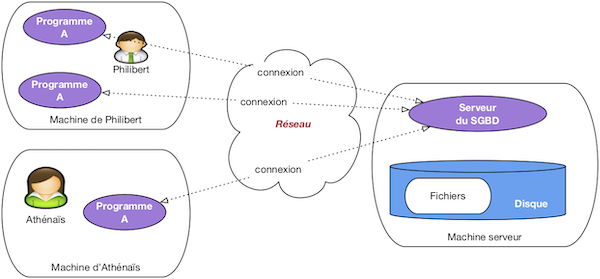  
  
Cette architecture est à peu près universellement adoptée par tous les SGBD. Les notions suivantes et le vocabulaire associé, sont donc très importantes à retenir.

> 📌 Un SGBD est instancié sur une machine sous la forme d’un **programme serveur** qui gère une ou plusieurs bases de données, chacune constituée de fichiers stockés sur disque. Il est seul responsable de tous les accès à une base, et de l’utilisation des ressources (mémoire, disques) qui servent de support à ces accès.  
> 📌 **Les programmes clients** se connectent au programme serveur via le réseau, lui transmettent des requêtes et reçoivent des données en retour. Ils ne disposent d’aucune information directe sur la base.

Le fait que le serveur de données s’interpose entre les fichiers et les programmes clients a une conséquence extrêmement importante : ces clients, n’ayant pas accès aux fichiers, ne voient les données que sous la forme que veut bien leur présenter le serveur. Ce dernier peut donc choisir le mode de représentation qui lui semble le plus approprié.  

Dans le cours de terminale, nous étudierons un modèle de représentation logique des données : **le modèle relationnel** et le langage qui permet d'interroger ce modèle le **SQL** (_Structured Query Language_)

### Quelques SGBD courants

- **MySQL** : SGBD open-source lancé en 1995 utilisé principalement par les applications web, utilisé par Facebook, Google, X, YouTube… Propriété d’Oracle depuis 2008, MySQL existe également en version payante (fonctionnalités supplémentaires).
- **MariaDB** : SGBD open-source créé en 2009 par des développeurs de MySQL suite à l’achat de ce dernier par Oracle en 2008. MariaDB est très similaire à MySQL et utilisé par Google, Mozilla, Amazon… 
- **PostgreSQL** : SGBD open-source utilisé par exemple dans des applications de jeux en ligne, installé par défaut sur les serveurs MacOS. Le projet Postgres a été initié en 1985 par Michael Stonebraker pour remplacer la base de données Ingres.
- **SQLite** : SGBD léger du domaine public, permet de manipuler localement des bases de données sans passer par un serveur (première version en 2000).
- **Oracle** : SGBD propriétaire, référence historique, puisque la première version du SGBD Oracle est sortie en 1979. Elle est développée par la société Oracle Corporation. 
- **Microsoft Access** : SGBD propriétaire de Microsoft, c'est un logiciel livré avec le pack _MS Office_ permettant de manipuler localement les bases de données, comme SQLite.
- **Microsoft SQL Server**: SGBD propriétaire de Microsoft, c'est un serveur SQL au même titre qu’Oracle ou MySQL.
- **MongoDB** développé depuis 2007 est un SGBD orienté documents avec des bases de données non relationnelles (mouvance _NoSQL_)
- **IBM db2** SGBD propriétaire d'IBM, lancé au début des annés 80, il est déployé sur les Mainframes, systèmes UNIX, Windows, macOS et Linux.

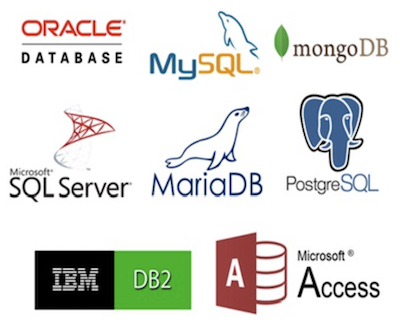


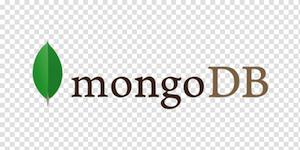
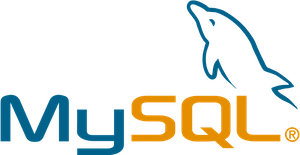
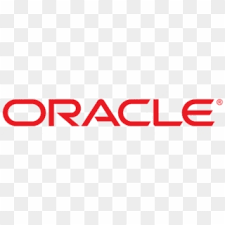
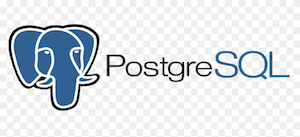
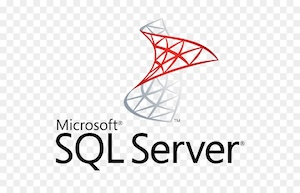
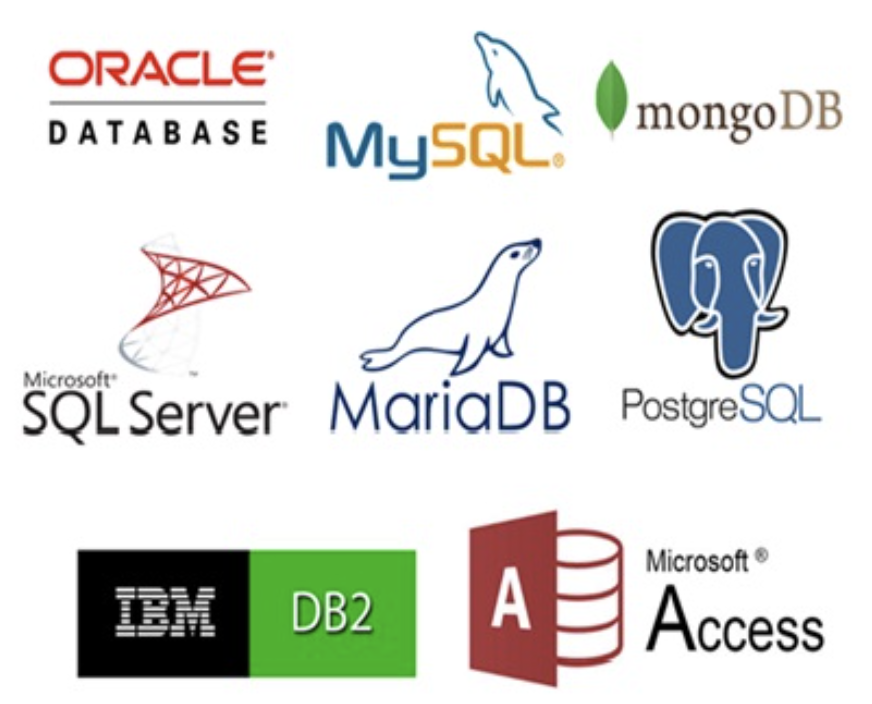

---
## Le modèle relationnel 

Théorisé en 1970 par le Britannique _Edgard J. Codd_, le modèle relationnel est à ce jour le modèle de base de données le plus utilisé, même si l'ère actuelle du Big Data tend à mettre en avant d'autres modèles non relationnels




### Introduction

Le modéle relationnel représente les données sous forme de tableaux à double entrée que l’on appelle **tables** ou **relations** (qui donnent son nom au modèle).

Par exemple la table `film` suivante :

| Titre     | Année | Genre  | Réalisateur  | Nationalité  |
|:---------:|:-----:|:------:|:------------:|:------------:|
| "La Guerre des étoiles" | 1977 | "Science Fiction" | George Lucas |  US |
| "Apocalypse Now" | 1979 | "Drame" | Francis Ford Coppola | US |
| "Il était une fois dans l'Ouest" | 1968 | "Western" | Sergio Leone | IT |
| "La vie est belle" | 1997 | "Drame" | Roberto Benigni | IT |
| "La Soupe aux choux" | 1981 | "Comédie" | Jean Girault | FR |
| "Le Bon, la Brute et le Truand" | 1966 | "Western" | Sergio Leone | IT |
| "Les Aventuriers de l'arche perdue" | 1981 | "Aventure" | George Lucas |  US |




### Vocabulaire

> 📌
>- Une **relation** ou **table** est l'endroit où sont rangées les données. 
>- Un **enregistrement** ou **entité** ou **tuple** correspond à une ligne du tableau, et donc un ensemble de valeurs liées entre elles : Le film "_Apocalypse Now_" est sorti en _1979_.
>- Une **entrée** est une cellule du tableau, une valeur. 
>- Le nombre d'enregistrements d'une relation s'appelle son **cardinal**.
>- Un **attribut** est l'équivalent d'une colonne. Il y a dans notre relation un attribut "_Titre_", un attribut "_Année_", un attribut "_Genre_", etc.
>- Le **domaine** désigne le type (au sens informatique : entier, flottant, chaîne de caractères, booléen…). L'attribut "_Titre_" est une chaîne de caractères. Par contre l'attribut "_Année_" est un nombre de 4 chiffres, son domaine est donc un entier. On peut utiliser les types _Int_ (entier), _Char_ (un caractère), _String_ (chaîne de caractères), _Float_ (flottant), _Date_ (date), _Time_ (durée type hh:mm:ss)…  
>- Le **degré** d’une relation est le nombre de ses attributs.
>- Le **schéma** d'une relation est une représentation du regroupement de tous les attributs et de leur domaine respectif. Ici notre schéma serait :   
>_film_ : { ($Titre$,Chaîne de caractères), ($Année$,Entier), ($Genre$,Chaîne de caractères), ($Réalisateur$, Chaîne de caractères), ($Nationalité$, Chaîne de caractères) }




### Clé primaire ou Primary Key ( PK )

Une base de données intègre ne doit pas contenir de doublon. 

> 📌 Une **clé primaire** est un attribut (ou une réunion d'attributs) dont la connaissance suffit à identifier avec certitude un unique enregistrement.

Observons, dans notre table `film`, ce qui peut être une clé primaire et ce qui ne peut pas l'être.  
- _Titre_ ne peut pas jouer le rôle de clé primaire, en effet deux films peuvent avoir le même nom.
- _Année_ ne peut pas jouer le rôle de clé primaire, en effet plusieurs films sont sortis chaque année.
- _Genre_ ne peut pas jouer le rôle de clé primaire, en effet il existe plusieurs films de chaque genre.
- _Réalisateur_ ne peut pas jouer le rôle de clé primaire, en effet un réalisateur peut avoir réalisé plusieurs films.
- _Nationalité_ ne peut pas jouer le rôle de clé primaire, en effet deux films peuvent avoir des réalisateurs de même nationalité.

Alors comment faire ?

- On peut utiliser un regroupement d'attributs, par exemple le regroupement (_Réalisateur_,_Titre_,_Année_) car on peut supposer qu'un même réalisateur ne fera jamais deux films du même nom la même année…

- On peut aussi parfois rajouter un attribut qui puisse les différencier de manière unique. En général, cela sera un entier qui s’incrémente à chaque nouvel enregistrement, certains SGDB permettent de le faire automatiquement.  
Dans notre exemple :

| idFilm  | Titre     | Année | Genre  | Réalisateur  | Nationalité  |
|:-------:|:---------:|:-----:|:------:|:------------:|:------------:|
|1| "La Guerre des étoiles" | 1977 | "Science Fiction" | George Lucas |  US |
|2| "Apocalypse Now" | 1979 | "Drame" | Francis Ford Coppola | US |
|3| "Il était une fois dans l'Ouest" | 1968 | "Western" | Sergio Leone | IT |
|4| "La vie est belle" | 1997 | "Drame" | Roberto Benigni | IT |
|5| "La Soupe aux choux" | 1981 | "Comédie" | Jean Girault | FR |
|6| "Le Bon, la Brute et le Truand" | 1966 | "Western" | Sergio Leone | IT |
|7| "Les Aventuriers de l'arche perdue" | 1981 | "Aventure" | George Lucas |  US |


⚠️ Dans un schéma, la clé primaire est soulignée. Le schéma de la table `film` deviendra donc :  

_film_ : { ($\underline{idFilm}$,Entier), ($Titre$, Chaîne de caractères), ($Année$,Entier), ($Genre$,Chaîne de caractères), ($Réalisateur$, Chaîne de caractères), ($Nationalité$, Chaîne de caractères) }




### Clé étrangère ou Foreign Key ( FK )

Dans notre table exemple, vous pouvez constater que chaque film contient les informations de son réalisateur. Ceci entraine des redondances d’information, par exemple il y a deux fois l’information sur la nationalité de Sergio Leone. Si celui-ci venait à changer de nationalité, il faudrait modifier toutes les enregistrements concernés. Cette opération serait non seulement fastidieuse mais en plus une source potentielle d'erreurs.  

- Pour éviter cette redondance, le modèle relationel préconise d'utiliser plusieurs tables. Nous allons donc  dans un premier temps créer une nouvelle table `realisateur` contenant les informations des réalisateurs :

| idReal  | Nom  | Nationalité  |
|:-------:|:------------:|:------------:|
|1| George Lucas |  US |
|2| Francis Ford Coppola | US |
|3| Sergio Leone | IT |
|4| Roberto Benigni | IT |
|5| Jean Girault | FR |

Son schéma sera : _realisateur_ : { ($\underline{idReal}$,Entier), ($Nom$, Chaîne de caractères), ($Nationalité$, Chaîne de caractères) }


- Ensuite, dans notre première table, les informations des réalisateurs seront remplacées par la clé primaire de la nouvelle table :

| idFilm  | Titre     | Année | Genre  | idReal  |
|:-------:|:---------:|:-----:|:------:|:------------:|
|1| "La Guerre des étoiles" | 1977 | "Science Fiction" | 1 |
|2| "Apocalypse Now" | 1979 | "Drame" | 2 |
|3| "Il était une fois dans l'Ouest" | 1968 | "Western" | 3 |
|4| "La vie est belle" | 1997 | "Drame" | 4 |
|5| "La Soupe aux choux" | 1981 | "Comédie" | 5 |
|6| "Le Bon, la Brute et le Truand" | 1966 | "Western" | 3 |
|7| "Les Aventuriers de l'arche perdue" | 1981 | "Aventure" | 1 |

La clé primaire de la table `realisateur` mentionnée dans la table `film` est appelée une **clé étrangère**.  
⚠️ Dans un schéma, une clé étrangère est précédée du caractère #. Le schéma de la table `film` deviendra donc :  

_film_ : { ($\underline{idFilm}$,Entier), ($Titre$, Chaîne de caractères), ($Année$,Entier), ($Genre$,Chaîne de caractères), ($\#idReal$, Entier) }

> 📌 Une **clé étrangère** est une clé utilisée dans une table pour faire référence à un enregistrement d’une autre table. C'est la clé primaire de l'autre table.




### Diagramme relationnel

Les schémas de nos deux tables seront donc :  
_realisateur_ : { ($\underline{idReal}$,Entier), ($Nom$, Chaîne de caractères), ($Nationalité$, Chaîne de caractères) }  
_film_ : { ($\underline{idFilm}$,Entier), ($Titre$, Chaîne de caractères), ($Année$,Entier), ($Genre$,Chaîne de caractères), ($\#idReal$, Entier) }

L’utilisation d’un **diagramme relationnel** aide à visualiser les relations entre les données. _Le diagramme ci-dessous a été réalisé à l'aide de l'outil en ligne [dbdiagram](https://dbdiagram.io/d)_

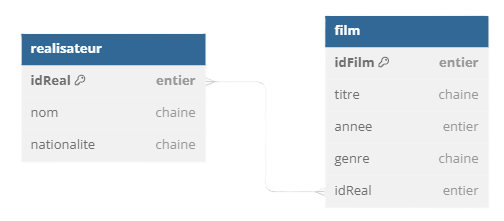




### Contraintes d'intégrité

📌 Une **contrainte d’intégrité** est une règle qui définit la cohérence d’une donnée ou d’un ensemble de données d’une base de donnée.
>- **La contrainte de domaine**: chaque attribut doit prendre une valeur dans le domaine de valeurs (entier, flottant etc...).
>- **La contrainte d’unicité** : Tout enregistrement est unique, la valeur d’une clé primaire ne doit apparaître qu’une fois dans une table. Elle doit être unique et non nulle.
>- **La contrainte d’intégrité référentielle** : Toutes les valeurs d’une clé étrangère d’une table doit correspondre à une valeur existante de la table à laquelle elle fait référence.

**Exemples :**

- L'ajout dans la table `film` de l'enregistrement suivant n'est pas possible car l'attribut _Genre_ doit être une chaîne de caractères (ici un entier) - **contrainte de domaine**.  
| idFilm  | Titre     | Année | Genre  | idReal  |
|:-------:|:---------:|:-----:|:------:|:-------:|
| 4 | "Le Parrain" | 1972 | 18 | 2 |  

- L'ajout dans la table `film` de l'enregistrement suivant n'est pas possible car il y a déjà un enregistrement avec **idFilm=4** dans cette table - **contrainte d'unicité**
| idFilm  | Titre     | Année | Genre  | idReal  |
|:-------:|:---------:|:-----:|:------:|:-------:|
| 4 | "Le Parrain" | 1972 | "Gangsters" | 2 |  
  
  
- L'ajout dans la table `film` de l'enregistrement suivant n'est pas possible car il n'y a pas d'enregistrement avec **idReal=6** dans la table `realisateur` - **contrainte d’intégrité référentielle**

| idFilm  | Titre     | Année | Genre  | idReal  |
|:-------:|:---------:|:-----:|:------:|:-------:|
| 8 | "Intouchables" | 2011 | "Comédie Dramatique" | 6 |



---
#### 💻 EXERCICE 1
> Les deux tables suivantes modélisent la flotte de voitures d'un réseau de location de voitures.  
> 
> Table `Agences` :
> | id_agence | Ville       | Dept  |
> |:---------:|:-----------:|:-----:|
> | 1         | Paris       |  75   |
> | 2         | Lyon        |  69   |
> | 3         | Marseille   |  13   |
> | 4         | Clermont-Fd |  63   |
> 
> Table `Voitures` : 
> | id_voiture  | Marque     | Modele    | Couleur  | km       | id_agence |
> |:-----------:|:----------:|:---------:|:--------:|:--------:|:---------:|
> | 1           | Renault    | Clio      | Bleu     | 92000    |  1        |
> | 2           | Peugeot    | 3008      | Gris     | 2000     |  4        |
> | 3           | Porsche    | Cayenne   | Noir     | 500      |  4        |
> | 4           | Toyota     | Yaris     | Rouge    | 115000   |  2        |

> - Quels sont les attributs de la table `Voitures` ?

> - Que vaut son cardinal ?

> - Quel est le degré de la table `Agences` ?

> - Citez un enregistrement de la table `Agences`

> - Citez une entrée de la table `Agences`

> - Quel est le domaine de l'attribut _Marque_ dans la table `Voitures` ?

> - Quel est le domaine de l'attribut _id_voiture_ dans la table `Voitures` ?

> - Quel est le schéma relationnel de la table `Agences` ?  
>
> 💡 ( ajoutez un tiret _ devant les mots à souligner )

> - Quelle est la clé primaire de la table `Agences` ?

> - Quelle est la clé primaire de la table `Voitures` ?

> - Quelle est la clé étrangère de la table `Voitures` ?

> - Quel est le schéma relationnel de la table `Voitures` ?

---
#### 💻 EXERCICE 2
> Considérons la base de données Tour de France 2020, contenant les tables suivantes  
> 
> Table `Equipes` :
> | codeEquipe | nomEquipe           |
> |:----------:|:-------------------:|
> | ALM        | AG2R La Mondiale    |
> | AST        | Astana Pro Team     |
> | TBM        | Bahrain - McLaren   |
> | BOH        | BORA - hansgrohe    |
> | CCC        | CCC Team            |
> | COF        | Cofidis, Solutions Crédits |
> | DQT        | Deceuninck - Quick Step    |
> | EF1        | EF Pro Cycling      |
> | GFC        | Groupama - FDJ      |
> | LTS        | Lotto Soudal        |
> 
> - Ecrivez son schéma relationnel

> Table `Coureurs` : 
> | dossard  | nomCoureur   | prenomCoureur    | codeEquipe | 
> |:--------:|:------------:|:----------------:|:----------:|
> | 141      | LÓPEZ        | Miguel Ángel     | AST        | 
> | 142      | FRAILE       | Omar             | AST        | 
> | 143      | HOULE        | Hugo             | AST        | 
> | 11       | ROGLIČ       | Primož           | TJV        | 
> | 12       | BENNETT      | George           | TJV        | 
> | 41       | ALAPHILIPPE  | Julian           | DQT        | 
> | 44       | CAVAGNA      | Rémi             | DQT        | 
> | 45       | DECLERCQ     | Tim              | DQT        | 
> | 121      | MARTIN       | Guillaume        | COF        | 
> 
> - Ecrivez son schéma relationnel 



> Table `Etapes` : 
> | noEtape  | villeDepart   | villeArrivee      | km    | 
> |:--------:|:-------------:|:-----------------:|:-----:|
> | 1        | Nice          | Nice              | 156   | 
> | 2        | Nice          | Nice              | 185   | 
> | 3        | Nice          | Sisteron          | 198   | 
> | 4        | Sisteron      | Orcières-Merlette | 160   | 
> | 5        | Gap           | Privas            | 198   | 
> 
> - Ecrivez son schéma relationnel

> Table `Temps` : 
> | dossard  | noEtape | tempsRealise |
> |:--------:|:-------:|:------------:|
> | 41       | 2       | 04:55:27     |
> | 121      | 4       | 04:07:47     |
> | 11       | 5       | 04:21:22     |
> | 122      | 5       | 04:21:22     |
> | 41       | 4       | 04:08:24     |
> 
> - Ecrivez son schéma relationnel

> - Dessinez sur une feuille le diagramme relationnel de la base

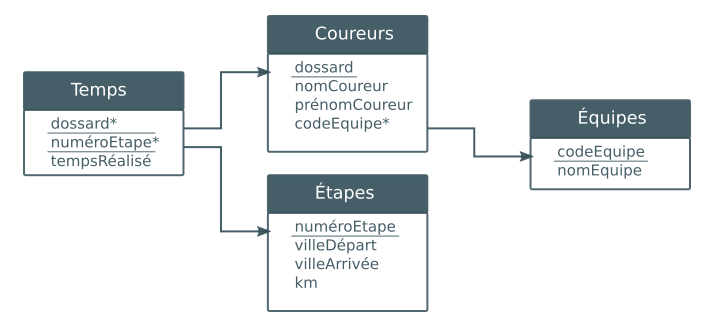

> - Quel temps a réalisé **Primož ROGLIČ** sur l'étape **Gap / Privas** ?

> - Quel est le nom de l'équipe du joueur qui a fait le meilleur temps sur l'étape **Sisteron / Orcières-Merlette** ?

> - Peut-on insérer la ligne suivante dans la table `Coureurs` ? Pourquoi ? Comment corriger ?
> | dossard  | nomCoureur   | prenomCoureur    | codeEquipe | 
> |:--------:|:------------:|:----------------:|:----------:|
> | 41       |  Viviani     | Elia             | COF        | 

> - Peut-on insérer la ligne suivante dans la table `Etapes` ? Pourquoi ? Comment corriger ?
> | noEtape  | villeDepart   | villeArrivee      | km    | 
> |:--------:|:-------------:|:-----------------:|:-----:|
> | 6        | Le Teil       | Mont Aigoual      | I91   | 

> - Peut-on insérer la ligne suivante dans la table `Temps` ? Pourquoi ? Comment corriger ?
> | dossard  | noEtape | tempsRealise |
> |:--------:|:-------:|:------------:|
> | 55       | 7       | 05:22:30     |